In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 5s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
import numpy as np

In [7]:
def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 85ms/step - loss: 0.5709 - accuracy: 0.7608 - val_loss: 0.4628 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3773 - accuracy: 0.8883 - val_loss: 0.3522 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2804 - accuracy: 0.9153 - val_loss: 0.3017 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2228 - accuracy: 0.9313 - val_loss: 0.3275 - val_accuracy: 0.8654
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1876 - accuracy: 0.9420 - val_loss: 0.2922 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1574 - accuracy: 0.9516 - val_loss: 0.2874 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1356 - accuracy: 0.9591 - val_loss: 0.3057 - val_accuracy: 0.8827
Epoch 8/20
30

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


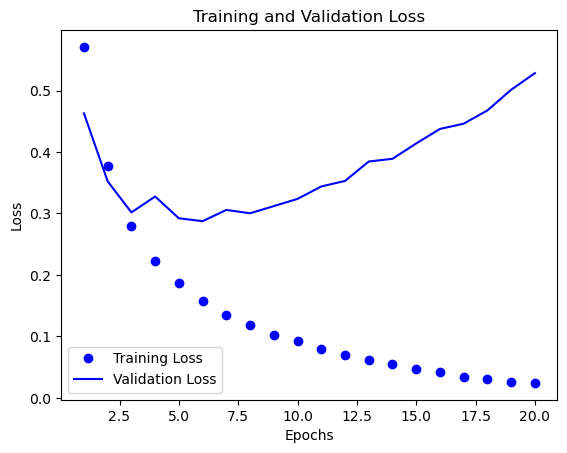

In [28]:
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [31]:
from keras import optimizers, losses, metrics

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])


history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 36ms/step - loss: 0.6724 - binary_accuracy: 0.6193 - val_loss: 0.6476 - val_binary_accuracy: 0.7127
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.6176 - binary_accuracy: 0.7627 - val_loss: 0.5961 - val_binary_accuracy: 0.7864
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5635 - binary_accuracy: 0.8171 - val_loss: 0.5501 - val_binary_accuracy: 0.8139
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5162 - binary_accuracy: 0.8449 - val_loss: 0.5114 - val_binary_accuracy: 0.8339
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4755 - binary_accuracy: 0.8609 - val_loss: 0.4774 - val_binary_accuracy: 0.8448
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.4394 - binary_accuracy: 0.8737 - val_loss: 0.4481 - val_binary_accuracy: 0.8538
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - los

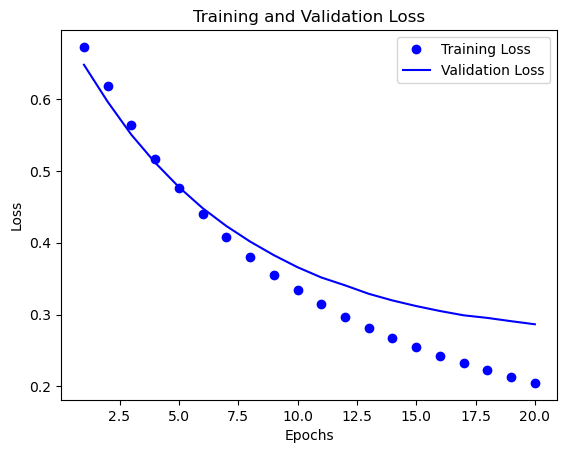

In [34]:
history_dict = history.history
loss_value = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_value, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
plt.clf()

<Figure size 640x480 with 0 Axes>

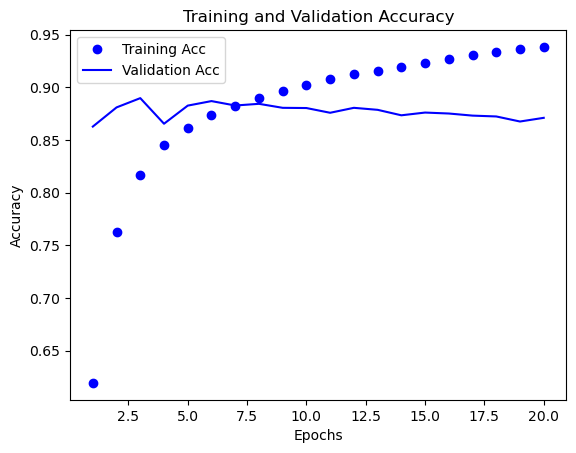

In [36]:
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()